In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, r2_score

In [12]:
d = pd.read_csv("nvda_stock_data.csv")

In [24]:
d.head(20)

,Date,Close,High,Low,Open,Volume,Days
0,2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000,0 days
1,2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000,1 days
2,2020-01-06,5.901757,5.906985,5.757612,5.783752,262636000,4 days
3,2020-01-07,5.973209,6.019017,5.885078,5.930139,314856000,5 days
4,2020-01-08,5.984413,6.025740,5.928896,5.968977,277108000,6 days
5,2020-01-09,6.050136,6.122582,5.996362,6.070800,255112000,7 days
6,2020-01-10,6.082500,6.187809,6.068310,6.157436,316296000,8 days
7,2020-01-13,6.273202,6.298347,6.142998,6.165653,319840000,11 days
8,2020-01-14,6.156192,6.255774,6.142997,6.230380,359088000,12 days
9,2020-01-15,6.113619,6.191293,6.087727,6.168887,263104000,13 days


In [19]:
d["Date"] = pd.to_datetime(d["Date"],format="%d-%m-%Y")

In [38]:
d["Days"] = (d["Date"] - d["Date"].min()).dt.days

In [39]:
d

,Date,Close,High,Low,Open,Volume,Days
0,2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000,0
1,2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000,1
2,2020-01-06,5.901757,5.906985,5.757612,5.783752,262636000,4
3,2020-01-07,5.973209,6.019017,5.885078,5.930139,314856000,5
4,2020-01-08,5.984413,6.025740,5.928896,5.968977,277108000,6
...,...,...,...,...,...,...,...
1253,2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000,1818
1254,2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600,1820
1255,2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600,1821
1256,2024-12-30,137.490005,140.270004,134.020004,134.830002,167734700,1824


TRAIN TEST SPLIT

In [40]:
x = d[["Days"]]
y = d["Close"]

In [41]:
d["Days"].dtypes, d["Close"].dtypes

(dtype('int64'), dtype('float64'))

In [42]:
d.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
Days               int64
dtype: object

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = False)

USING LINEAR REGRESSION

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(64.68828739050483, -590.3323352725055)

In [48]:
d["Pred"]=lr.predict(x)

In [50]:
y_pred = lr.predict(x_test)

In [52]:
mae = mean_absolute_error(y_test,y_pred)
mae

66.22076431425333

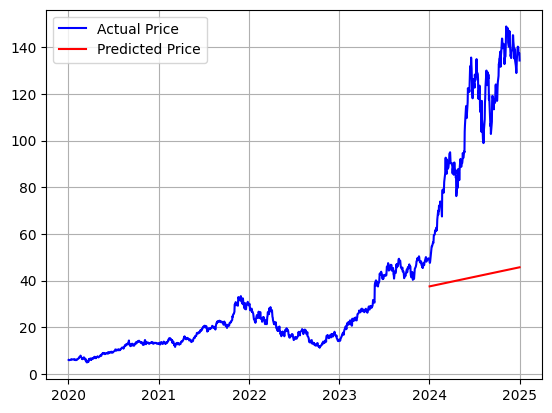

In [60]:
plt.plot(d["Date"],d["Close"],label="Actual Price",color="blue")
plt.plot(d.iloc[-len(y_test):]["Date"],y_pred,label="Predicted Price",color="red")
plt.grid(True)
plt.legend()